# Lung Cancer Prediction

In [1]:
import jovian

<IPython.core.display.Javascript object>

In [2]:
jovian.configure()

[jovian] It looks like Jovian is already configured ( check ~/.jovian/credentials.json ).
Do you want to overwrite the existing configuration? [y/N]: 

 N


[jovian] Skipping..


In [3]:
jovian.commit(filename='Lung-Cancer-Prediction.ipynb')

<IPython.core.display.Javascript object>

[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 

 ·································································································································································································································································································································


[jovian] Updating notebook "bharathkalyans/lung-cancer-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/bharathkalyans/lung-cancer-prediction


'https://jovian.ai/bharathkalyans/lung-cancer-prediction'

### Importing Libraries

In [140]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Reading data from CSV and Loading into Data Frame

In [141]:
# Loading CSV files to our dataframe!
dataframe = pd.read_csv('lung_cancer_data_set.csv')

In [142]:
dataframe.head()
# 1 represent's NO &  2 represent's YES

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
dataframe.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


## PreProcessing and Cleaning Data

In [143]:
# List all attributes (columns)
columns = dataframe.columns
columns = columns.tolist() # Getting list of attributes
print(columns)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


#### Dealing with null,duplicate and String values

In [144]:
dataframe.isnull().sum()
# No null values present in the Data Set!

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [145]:
# Below Code displays the Number of Duplicate Values and Removes them!
duplicate_values = dataframe.duplicated()
print('Number of Duplicate Values in the Data Set :: ',duplicate_values.sum())
dataframe[duplicate_values]

Number of Duplicate Values in the Data Set ::  33


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [95]:
dataframe.drop_duplicates(inplace=True)
duplicates = dataframe.duplicated()
print(duplicates)
print(duplicates.sum())
print(dataframe.shape)

0      False
1      False
2      False
3      False
4      False
       ...  
279    False
280    False
281    False
282    False
283    False
Length: 276, dtype: bool
0
(276, 16)


In [146]:
dataframe.dtypes
# No string values and boolean values!(Boolean values automatially get converted to numeric 0's and 1's)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [147]:
# Replacing values 0 now signifies NO and 1 signifies 'YES'!
dataframe = dataframe.replace(1,0)    
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,2,2,0,0,2,0,2,2,2,2,2,2,YES
1,M,74,2,0,0,0,2,2,2,0,0,0,2,2,2,YES
2,F,59,0,0,0,2,0,2,0,2,0,2,2,0,2,NO
3,M,63,2,2,2,0,0,0,0,0,2,0,0,2,2,NO
4,F,63,0,2,0,0,0,0,0,2,0,2,2,0,0,NO


In [148]:
dataframe = dataframe.replace(2,1)   
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [149]:
dataframe['LUNG_CANCER'] = dataframe['LUNG_CANCER'].replace('YES',1)
dataframe['LUNG_CANCER'] = dataframe['LUNG_CANCER'].replace('NO',0)
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [150]:
dataframe["GENDER"] = dataframe["GENDER"].replace('M',1)
dataframe["GENDER"] = dataframe["GENDER"].replace('F',0)

In [151]:
dataframe.shape
# 16 --> Attributes
# 309 --> Instances

(309, 16)

In [152]:
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


#### Description of the Data Set

In [153]:
dataframe.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
print(dataframe.nunique())
# Unique Values in each column!

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


## Data Visualization

In [105]:
sb.set_style("whitegrid")

<AxesSubplot:title={'center':'No. of Lung Cancer Diagnosed People'}, xlabel='LUNG_CANCER', ylabel='count'>

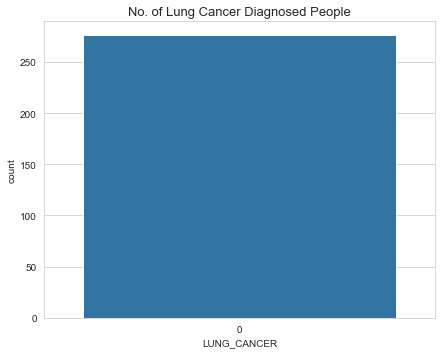

In [106]:
plt.figure(figsize=(7,12))
plt.subplot(2,1,1)
plt.title('No. of Lung Cancer Diagnosed People',fontsize=13)
sb.countplot(x='LUNG_CANCER',data = dataframe)
# Below graph shows the no.of people suffering with Lung Cancer!

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

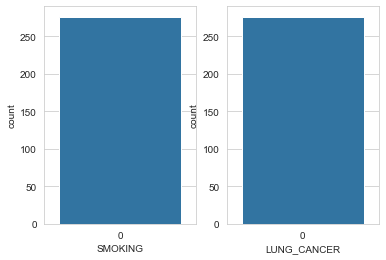

In [107]:
plt.subplot(1,2,1)
sb.countplot(x='SMOKING',data = dataframe)

plt.subplot(1,2,2)
sb.countplot(x='LUNG_CANCER',data = dataframe)


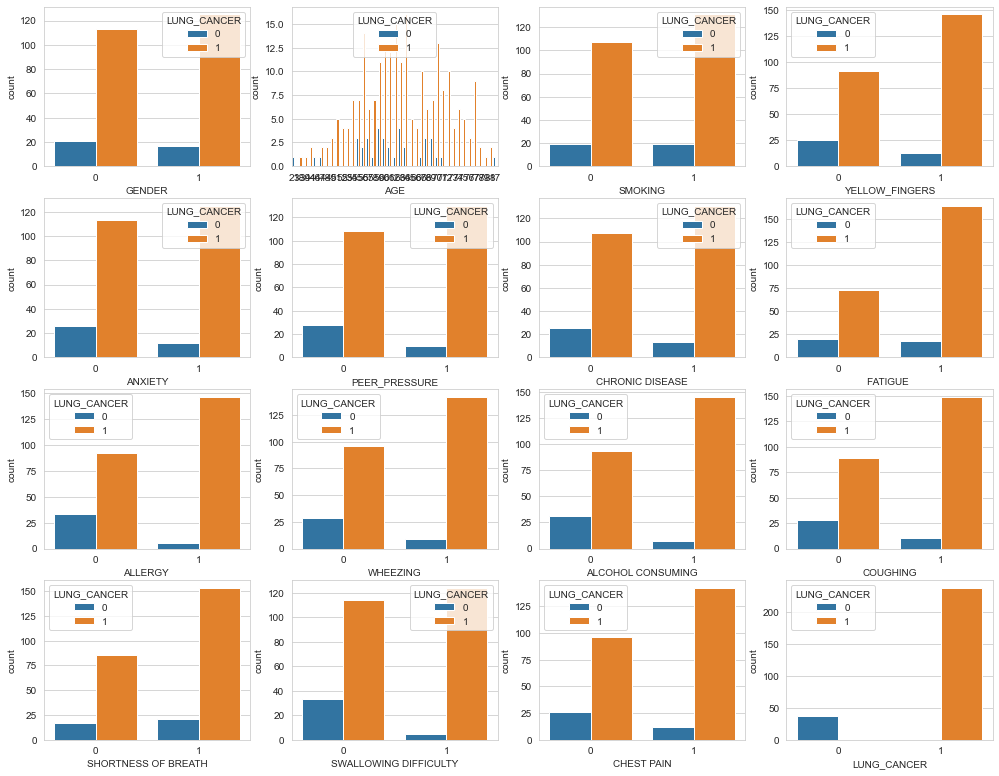

In [26]:
plt.figure(figsize=(17,17))
for i in enumerate(columns):
    plt.subplot(5,4,i[0]+1)
    sb.countplot(x=i[1], hue='LUNG_CANCER' ,data = dataframe)
    

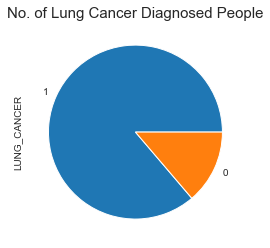

In [27]:
# Pie chart
plt.title('No. of Lung Cancer Diagnosed People',fontsize=15)
dataframe['LUNG_CANCER'].value_counts().plot.pie()
plt.show()

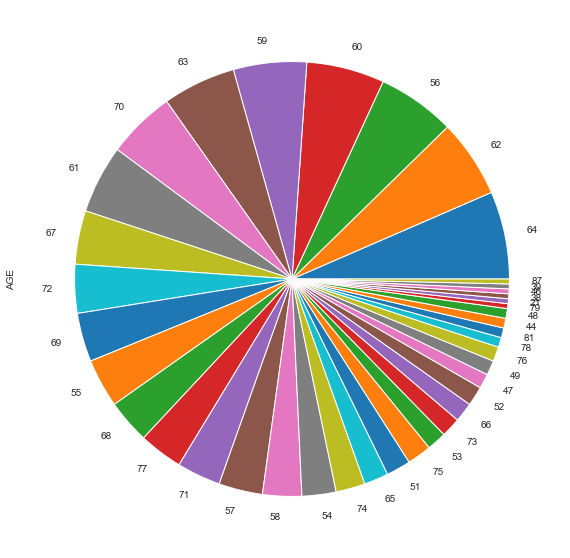

In [28]:
# Pie Chart of all Age Groups!

plt.figure(figsize=(10,10))
dataframe['AGE'].value_counts().plot.pie()
plt.show()

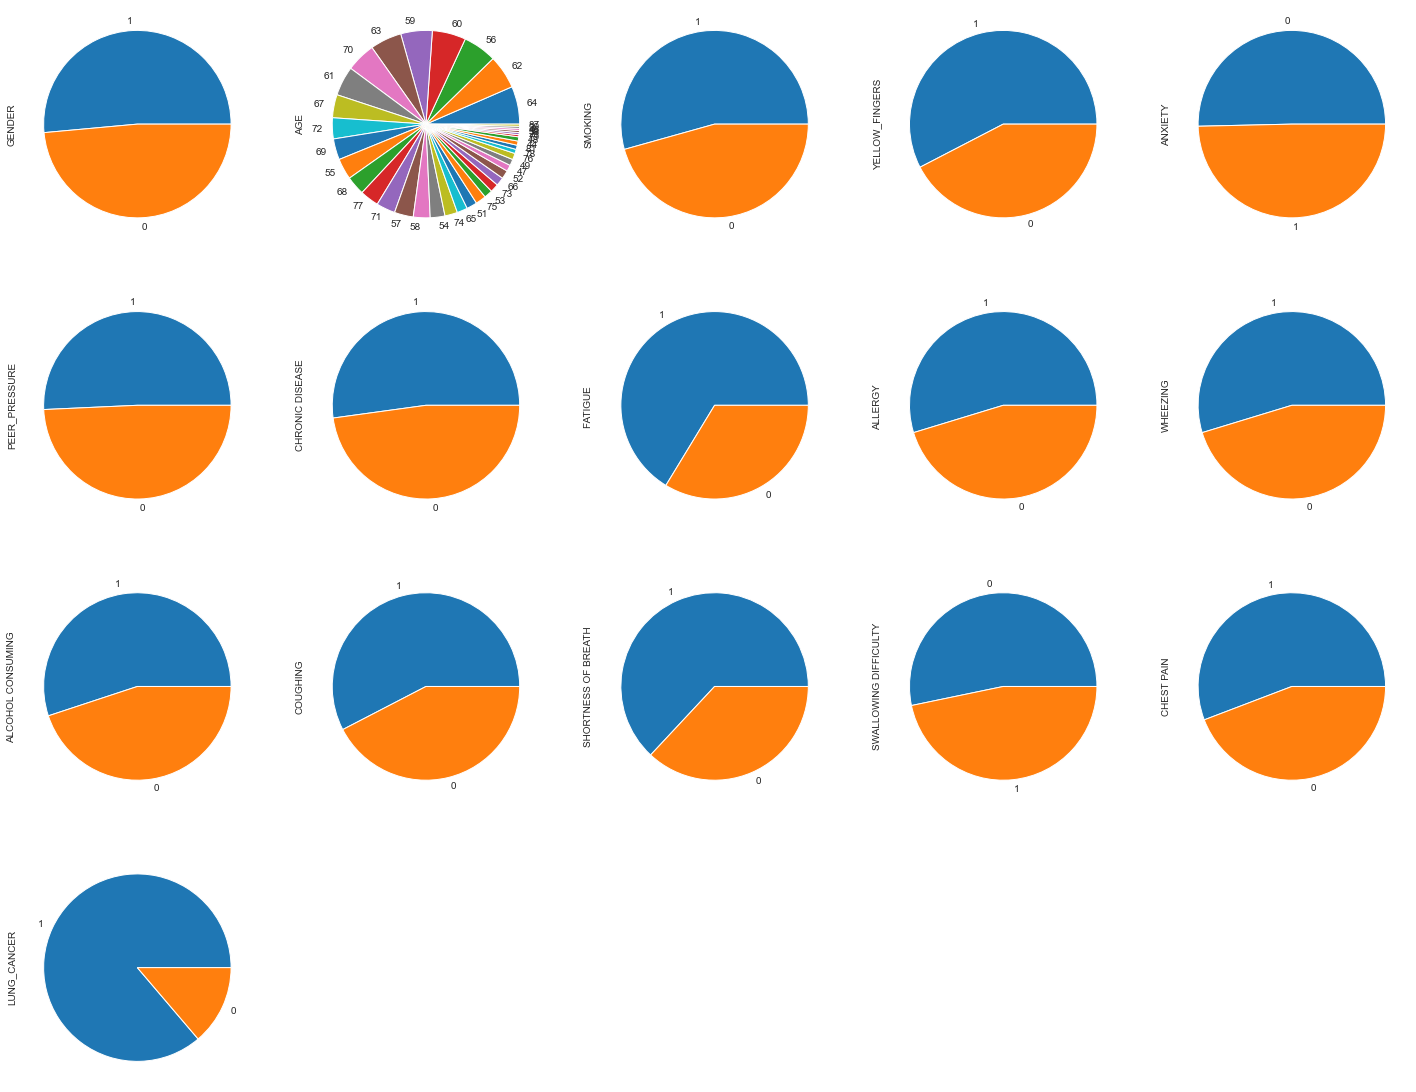

In [29]:
# Creating Sub Plots of all attributes! for better Visualization!
plt.figure(figsize=(25,25))
for i in range(0,len(columns)):
    plt.subplot(5,5,i+1)
    dataframe[columns[i]].value_counts().plot.pie()
    


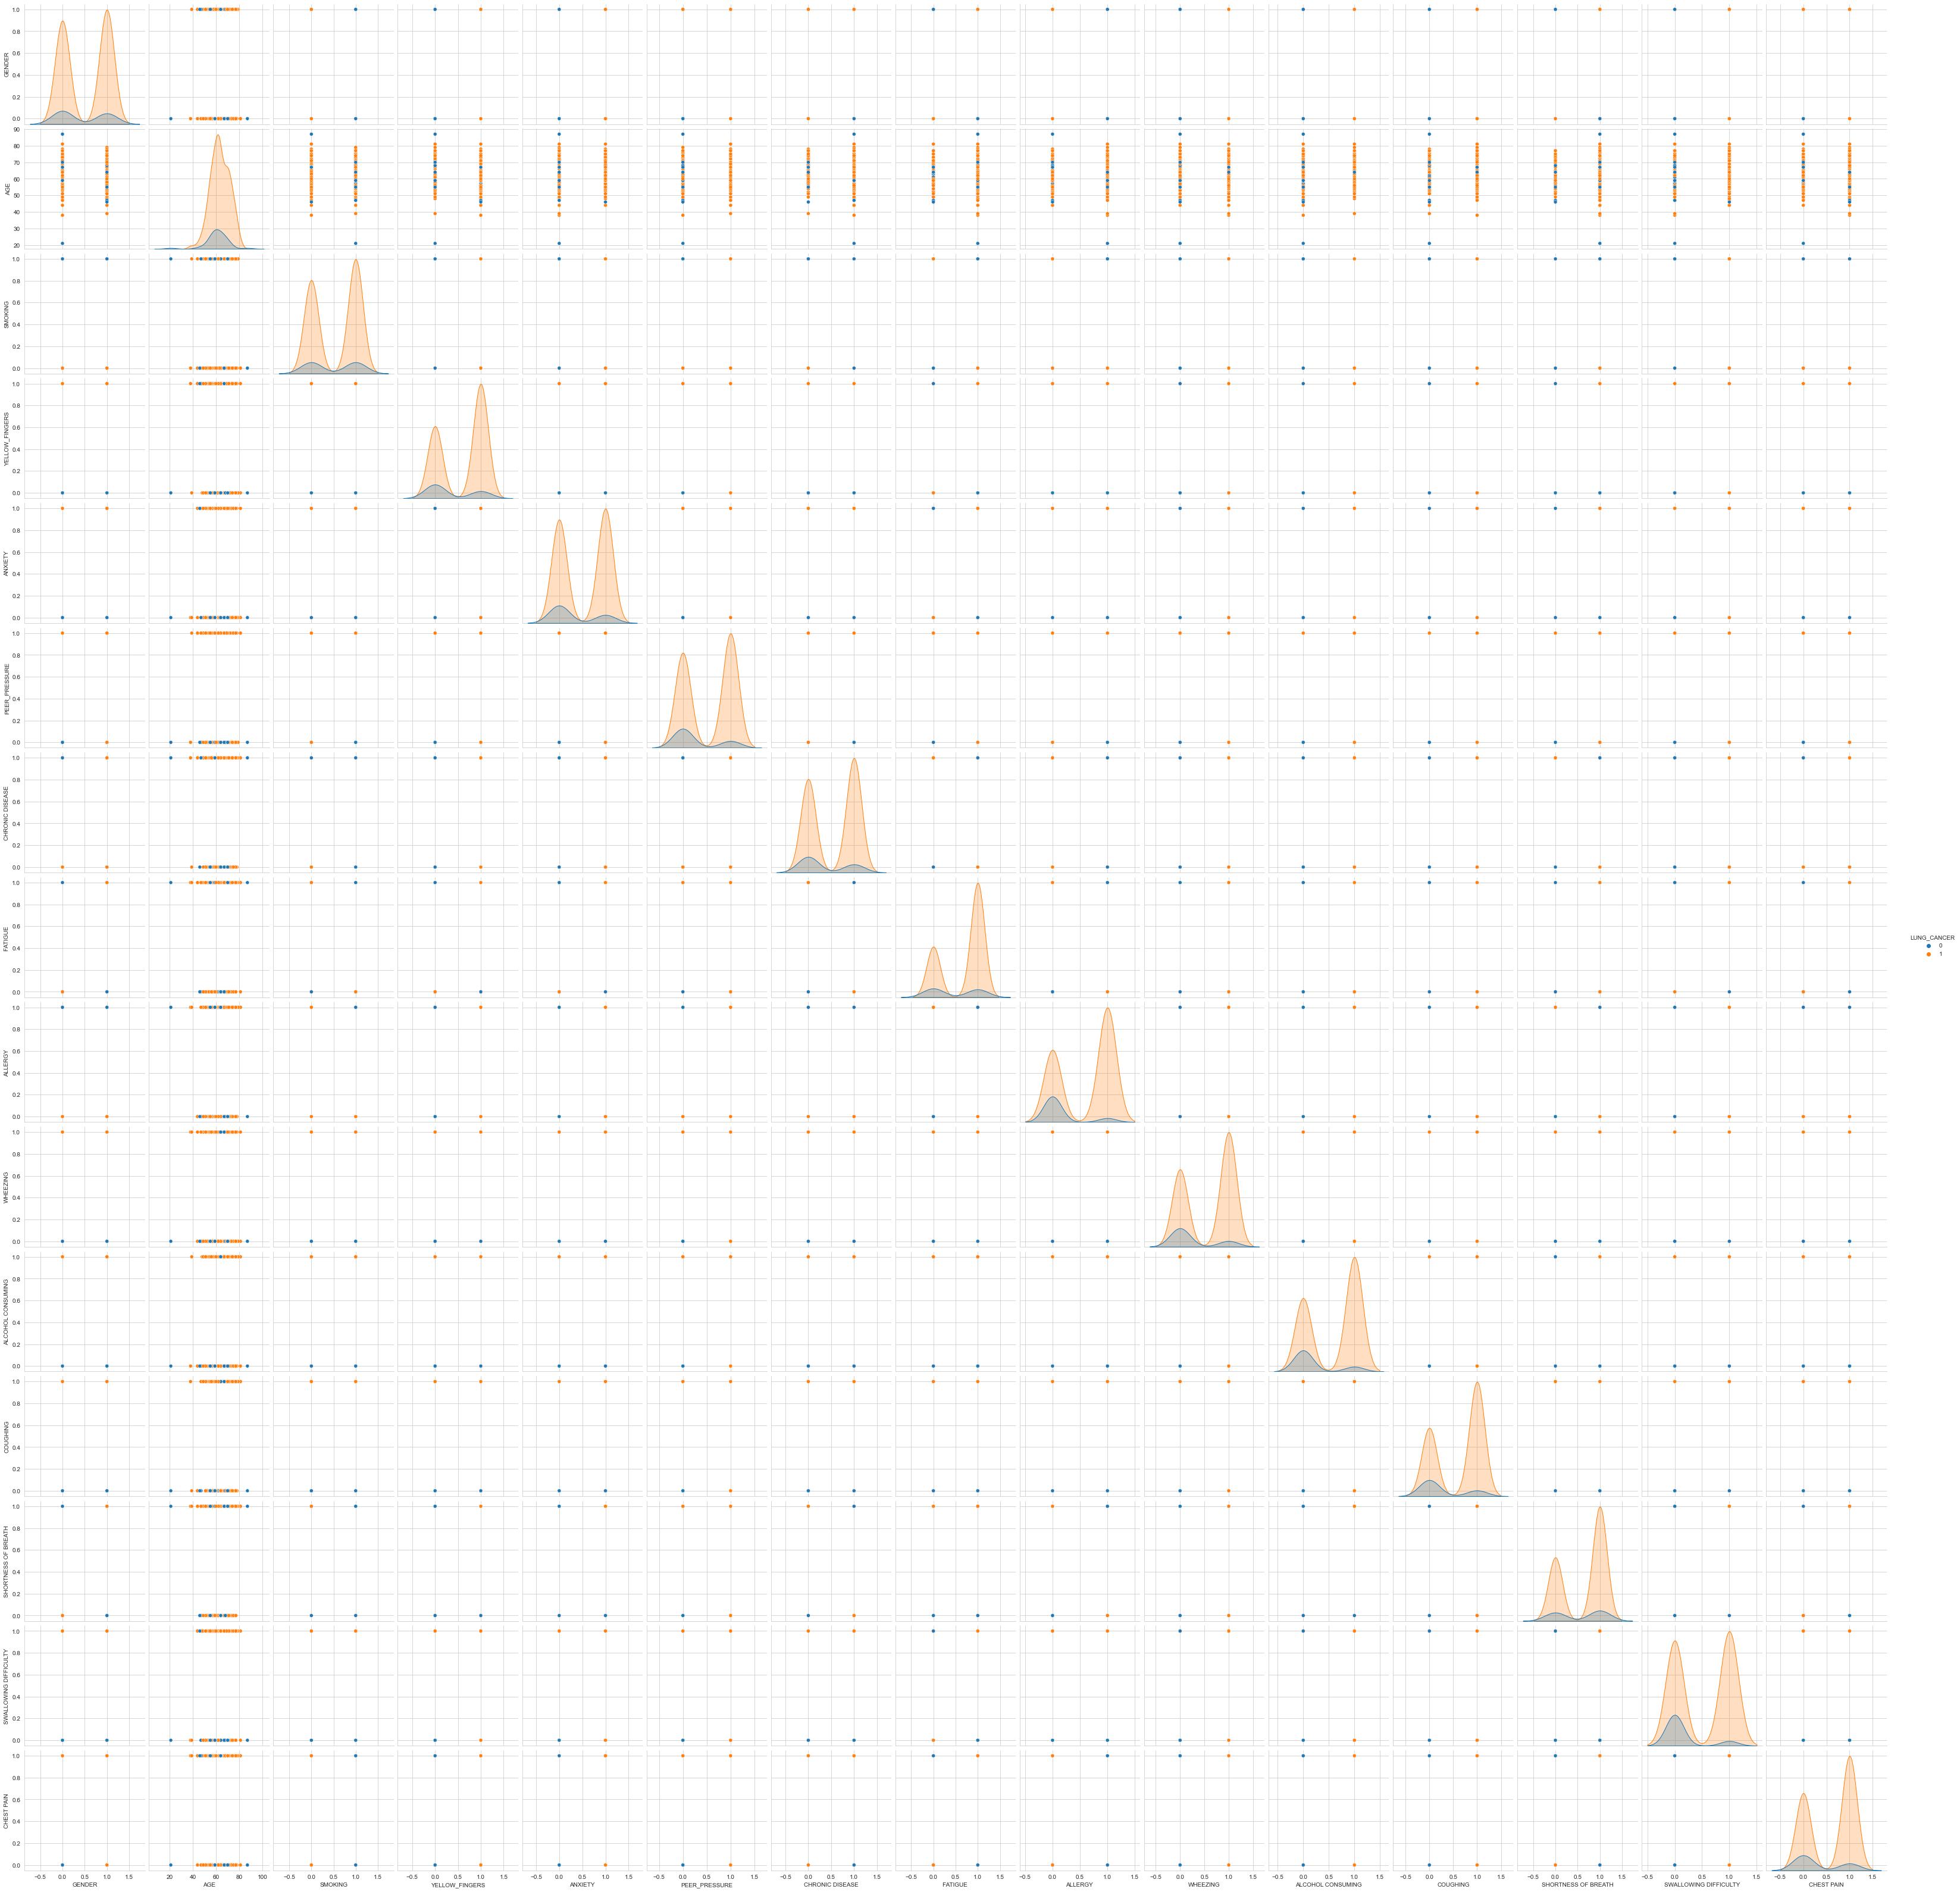

In [30]:
sb.pairplot(dataframe,height=3,hue='LUNG_CANCER')

### Corelation between Variables

In [31]:
corelation = dataframe.corr()
corelation

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.013120,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


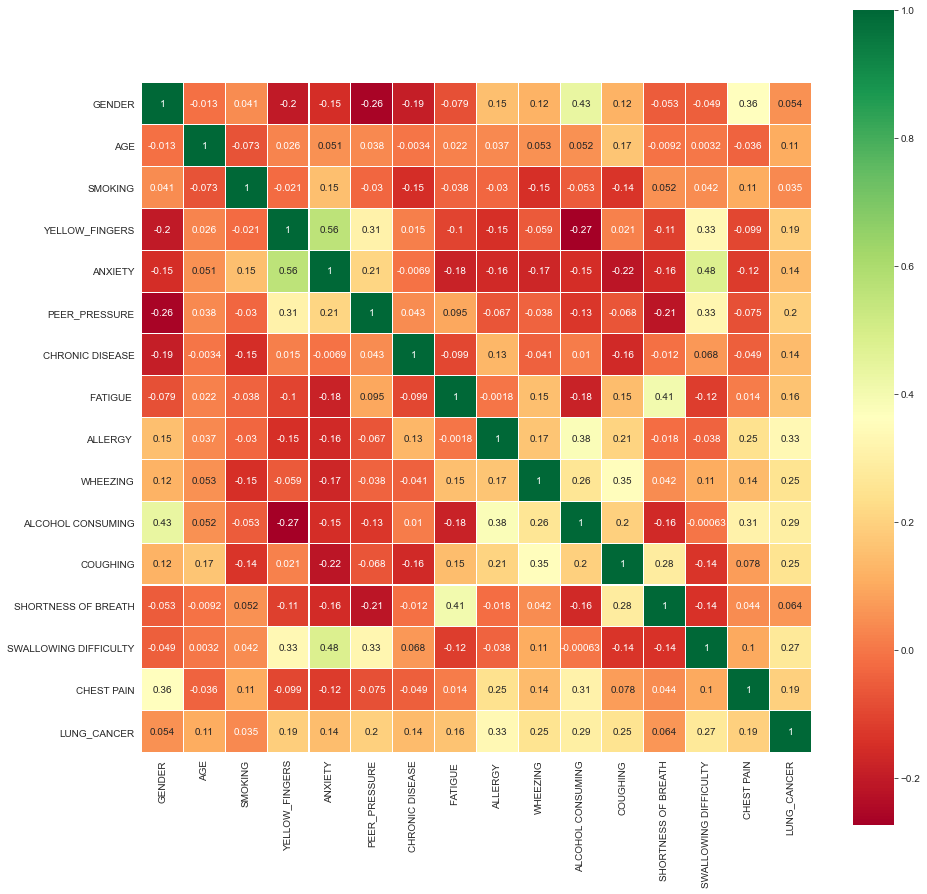

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,square=True,linewidth=0.1,annot=True,cmap='RdYlGn')
plt.show()

We can see a strong co relation between Anxiety and Yellow Fingers and Swallowing Difficulty! Seaborn comes in our help making things easier 
by visually displaying the Corelation!

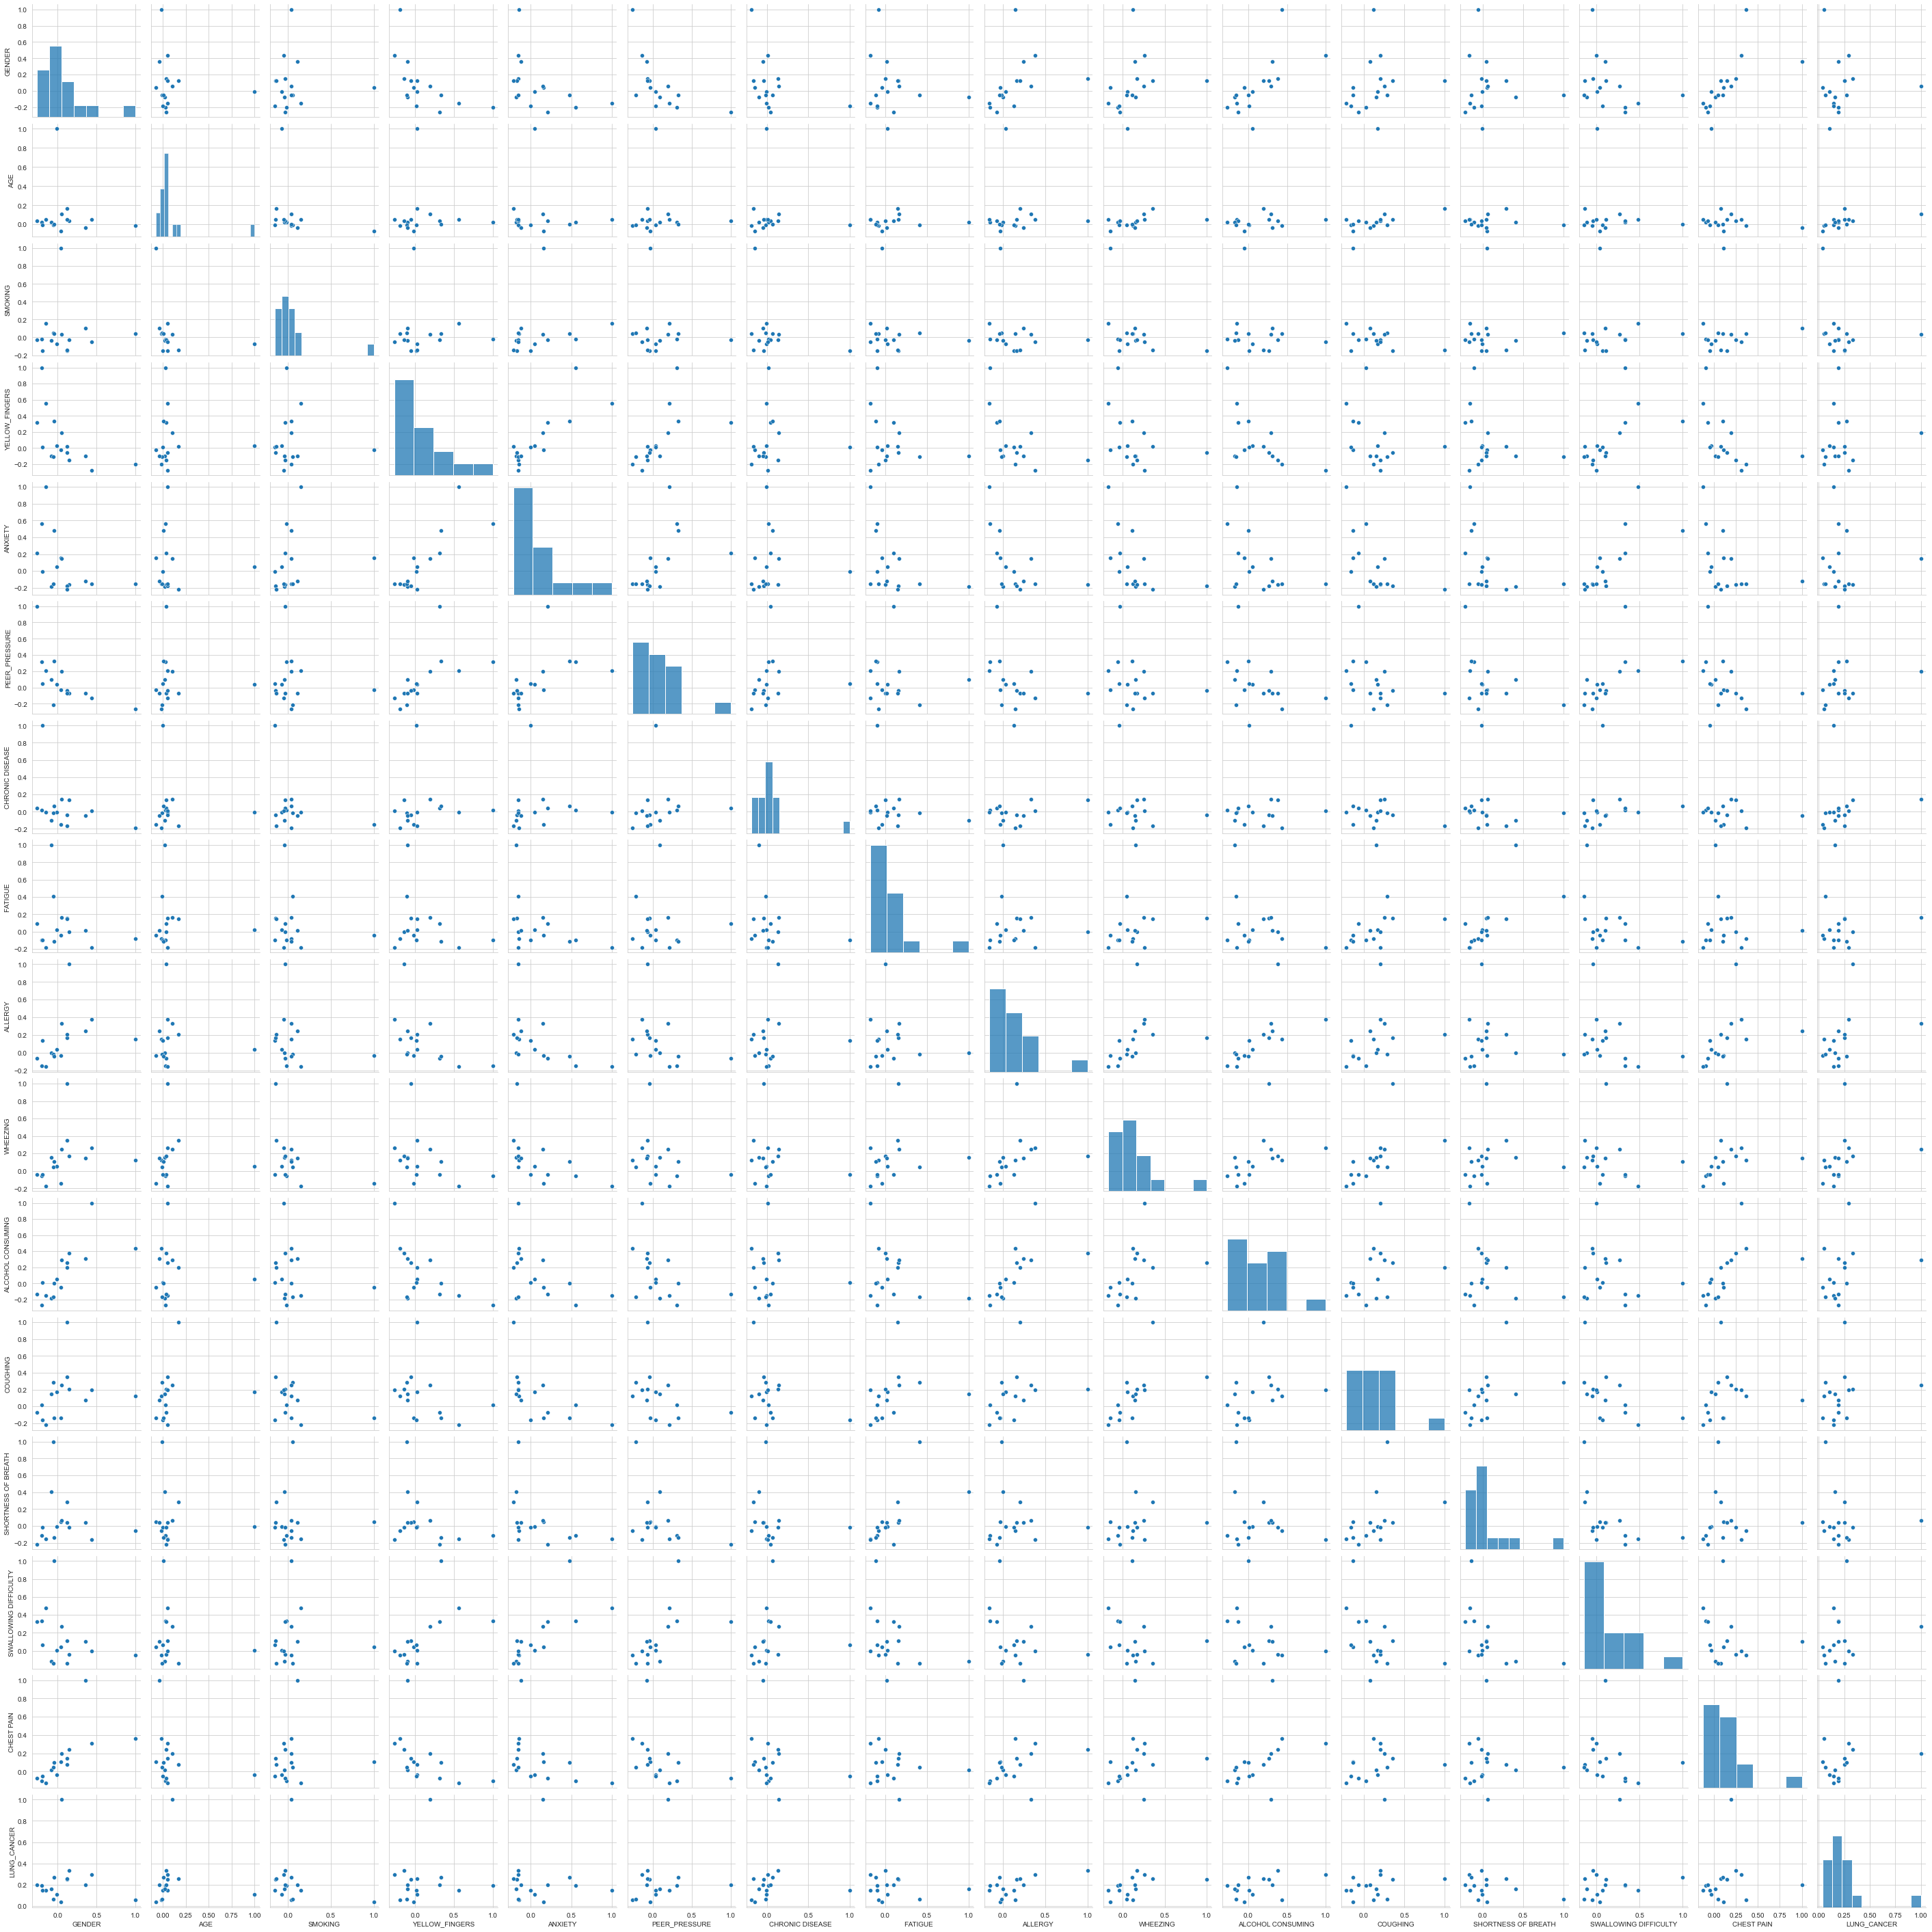

In [35]:
sb.pairplot(corelation)

## Splitting Data Set

In [36]:
from sklearn.model_selection import train_test_split 

In [37]:
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


### Supervised Learning

Our target is 'Lung Cancer' Attribute! Dividing the dataset and splitting them!
We will be using Classifier Algorithms because in Supervised Learning and that too in predictions if our outcomes are supposed to be YES or NO, it is suggested to use Classifier algorithms.Regression Algoriths are used for continous change in values like prices,salary,etc.

Refer https://www.javatpoint.com/regression-vs-classification-in-machine-learning

In [155]:
x_dataframe = dataframe.drop('LUNG_CANCER',axis=1)
x_dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1


In [156]:
y_dataframe = dataframe['LUNG_CANCER']
y_dataframe

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x_dataframe,y_dataframe)

In [158]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
44,0,70,1,1,0,1,1,0,0,0,1,1,0,1,0
56,0,63,0,1,0,1,0,1,0,0,0,1,1,0,1
67,1,66,1,0,0,0,0,1,0,1,1,1,1,0,0
267,1,60,1,1,1,1,1,0,1,0,1,0,0,1,1
290,1,76,1,0,0,0,0,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1,68,0,0,1,1,1,0,0,0,1,0,0,0,0
171,0,57,0,1,1,0,0,0,0,0,0,1,0,0,0
302,0,65,1,1,1,1,0,1,0,1,0,1,1,1,0
218,0,70,0,0,0,1,1,0,1,0,1,1,1,0,0


In [159]:
y_train

44     1
56     1
67     1
267    1
290    1
      ..
159    0
171    0
302    1
218    1
288    1
Name: LUNG_CANCER, Length: 231, dtype: int64

### Selection of Model

#### GaussianNB

In [160]:
# We will be using Naive Bayes and GaussainNB Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
model

GaussianNB()

In [161]:
y_model = model.predict(x_test)
y_model

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [162]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_model)  # Gives you the accuracy!
print('Accuracy Score using GaussianNB :: ',accuracy * 100,'%')

Accuracy Score using GaussianNB ::  89.74358974358975 %


In [163]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
mat

array([[ 5,  4],
       [ 4, 65]])

Text(34.0, 0.5, 'True Value')

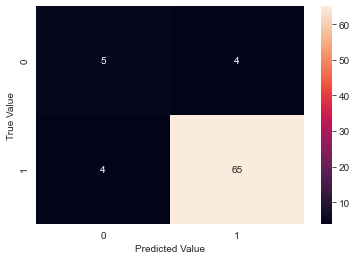

In [164]:
sb.heatmap(mat,annot = True,cbar = True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

The above confusion matrix shows that we have 2 + 3 = 5 false prediction and 4 + 60 = 64 correct predictions!

#### BernoulliNB

In [165]:
# We will be using Naive Bayes and BernoulliNB Classifier
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)
model

BernoulliNB()

In [166]:
y_model = model.predict(x_test)
y_model

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [167]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_model)  # Gives you the accuracy!
print('Accuracy Score using BernoulliNB :: ',accuracy * 100,'%')

Accuracy Score using BernoulliNB ::  91.02564102564102 %


In [168]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
mat

array([[ 5,  4],
       [ 3, 66]])

Text(34.0, 0.5, 'True Value')

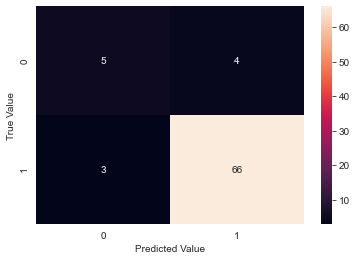

In [169]:
sb.heatmap(mat,annot = True,cbar = True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

The above confusion matrix shows that we have 2 + 2 = 4 false prediction and 5 + 60 = 65 correct predictions!

### Conclusion

##### We have used SuperVised Learning Algorithm's Naive Bayes Classifier to get the accuracy of the trained model.
##### We have achieved '92.7536231884058'% using Gaussian NB and '94.20289855072464'% using BernoulliNB.
##### This shows us that using BernoulliNB we are getting better accurate results.

In [170]:
dataframe["GENDER"] = dataframe["GENDER"].replace(1,"MEN")
dataframe["GENDER"] = dataframe["GENDER"].replace(0,"WOMEN")
dataframe["LUNG_CANCER"] = dataframe["LUNG_CANCER"].replace(1,"HAS LUNG CANCER")
dataframe["LUNG_CANCER"] = dataframe["LUNG_CANCER"].replace(0,"DOESN'T HAVE LUNG CANCER")
dataframe = dataframe.replace(0,"NO")
dataframe = dataframe.replace(1,"YES")
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MEN,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,HAS LUNG CANCER
1,MEN,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,HAS LUNG CANCER
2,WOMEN,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,DOESN'T HAVE LUNG CANCER
3,MEN,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,DOESN'T HAVE LUNG CANCER
4,WOMEN,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,DOESN'T HAVE LUNG CANCER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,WOMEN,56,NO,NO,NO,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,HAS LUNG CANCER
305,MEN,70,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,NO,YES,HAS LUNG CANCER
306,MEN,58,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,HAS LUNG CANCER
307,MEN,67,YES,NO,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,YES,HAS LUNG CANCER


In [171]:
jovian.commit(filename = 'Lung-Cancer-Prediction.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bharathkalyans/lung-cancer-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/bharathkalyans/lung-cancer-prediction


'https://jovian.ai/bharathkalyans/lung-cancer-prediction'

In [172]:
import pickle

In [173]:
pickle_out = open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()